In [5]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [6]:
np.random.seed(42)
D = 20
N = 5000
M = 20

In [7]:
# Generate a mixture of Gaussians
train_data = np.vstack([
    np.random.normal(loc=0, scale=1, size=(N // 2, D)),
    np.random.normal(loc=5, scale=2, size=(N // 2, D))
])

In [8]:
# Generate test data with some outliers
test_data = np.vstack([
    np.random.normal(loc=0, scale=2, size=(M // 2, D)),  # Inliers
    np.random.normal(loc=10, scale=3, size=(M // 2, D))  # Outliers
])

In [9]:
def detect_outliers_kde(train_data: np.ndarray, test_data: np.ndarray):
    """
    Detects outliers in D-dimensional space using Kernel Density Estimation (KDE).

    Parameters:
    - train_data: (N, D) numpy array, training dataset (assumed to represent the true distribution).
    - test_data: (M, D) numpy array, test dataset (points to evaluate for outlier probability).

    Returns:
    - outlier_probs: (M,) numpy array, probability of each test sample being an outlier.
    """
    kde = KernelDensity()
    kde.fit(train_data)
    mean_score = kde.score(train_data) / train_data.shape[0]
    out = 1 - np.exp(1-kde.score_samples(test_data) / mean_score)
    return out

In [10]:
scores = detect_outliers_kde(train_data, test_data)
scores

array([0.711922  , 0.44862332, 0.51074063, 0.55096722, 0.53520491,
       0.65120664, 0.5268606 , 0.59031343, 0.45179737, 0.47039207,
       0.72658215, 0.99934619, 0.7668072 , 0.99993483, 0.99972799,
       0.77093174, 0.74205072, 0.87559928, 0.91509005, 0.87991941])

In [11]:
kde = KernelDensity()
kde.fit(train_data);

In [12]:
mean_score = kde.score(train_data)/train_data.shape[0]

In [13]:
x = np.zeros((1, D))
x[:] = 10
kde.score_samples(test_data) / mean_score

array([ 2.244524  ,  1.59533708,  1.71486252,  1.80065938,  1.76615864,
        2.05327561,  1.74836522,  1.89236289,  1.6011103 ,  1.63561829,
        2.29675408,  8.33269807,  2.45588969, 10.63845664,  9.20968931,
        2.47373526,  2.35499229,  3.08424734,  3.46616397,  3.11959221])

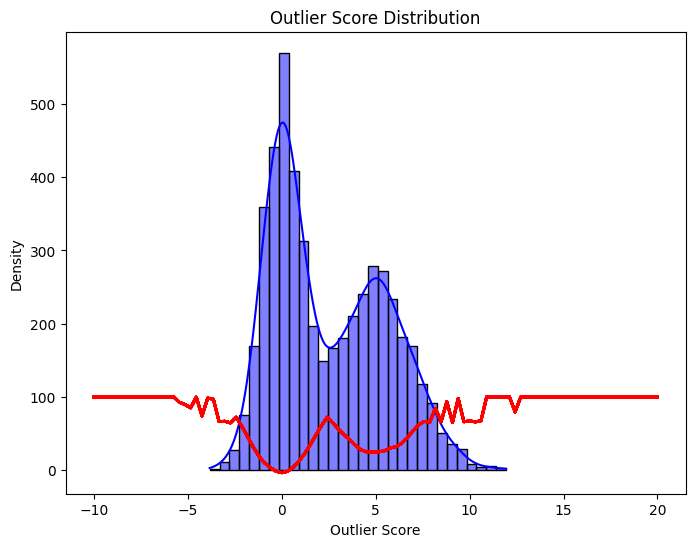

In [14]:
k = 0

plt.figure(figsize=(8, 6))
sns.histplot(train_data[:, k], kde=True, bins=30, color='blue', alpha=0.5)

x = np.linspace(-10, 20, 100)
x = np.tile(x[:, np.newaxis], (1, D))
y = detect_outliers_kde(train_data, x)

plt.plot(x, 100*y, c='r', lw=2)
plt.title(f'Outlier Score Distribution')
plt.xlabel('Outlier Score')
plt.ylabel('Density')
plt.show()

In [16]:

from ephys_atlas.plots import figure_features_chspace, plot_probe_rect, plot_probe_rect2
from ephys_atlas.features import voltage_features_set
from ephys_atlas.data import load_voltage_features, prepare_df_voltage

In [17]:
pid = "b72b22c2-6e9d-4604-9910-20c0e1a467d7"

In [18]:
local_data_path = Path('/home/cyrille/GIT/IBL/paper-ephys-atlas/data')

features = voltage_features_set()
mapping = 'Allen'
label = 'latest'

In [19]:
df_voltage, df_clusters, df_channels, df_probes = \
    load_voltage_features(local_data_path.joinpath(label), mapping=mapping)

2025-04-15 10:21:24 INFO     data.py:450  Loaded 384215 channels
2025-04-15 10:21:24 INFO     data.py:452  Remains 383831 channels after NaNs filtering


In [20]:
df_voltage = prepare_df_voltage(df_voltage, df_channels)


In [21]:
df_voltage

rms_ap  cor_ratio     rms_lf  \
pid                                  channel                                    
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -91.575161   0.754190 -90.644629   
                                     1       -91.571569   0.411007 -90.323467   
                                     2       -91.596631   0.451987 -90.232606   
                                     3       -91.589834   0.469155 -87.667768   
                                     4       -91.632872   0.338838 -89.531428   
...                                                 ...        ...        ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -88.357863   0.788894 -86.852443   
                                     380     -88.355415   0.766668 -86.533096   
                                     381     -88.355770   0.744558 -86.795452   
                                     382     -88.354009   0.696702 -86.330790   
                                     383     -88.354253   0.695542 -86.655819   

                                               psd_delta   psd_theta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -101.787283 -104.159496   
                                     1       -101.573927 -104.459178   
                                     2       -101.712161 -104.223009   
                                     3        -97.225263 -102.353363   
                                     4        -99.494953 -104.781015   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379      -96.893853 -101.622061   
                                     380      -96.756403 -101.407902   
                                     381      -97.154323 -101.746486   
                                     382      -96.286040 -101.416863   
                                     383      -97.056808 -101.644340   

                                               psd_alpha    psd_beta  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -105.973834 -112.510019   
                                     1       -106.397486 -112.693430   
                                     2       -106.204256 -112.325320   
                                     3       -104.408635 -110.429818   
                                     4       -106.740744 -112.371962   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -104.861699 -110.253048   
                                     380     -104.768071 -110.041355   
                                     381     -104.903059 -110.157332   
                                     382     -104.826851 -109.906594   
                                     383     -105.094410 -110.118663   

                                               psd_gamma     psd_lfp  \
pid                                  channel                           
00a824c0-e060-495f-9ebc-79c82fef4c67 0       -115.888470 -112.043098   
                                     1       -115.906262 -111.789864   
                                     2       -115.555288 -111.863034   
                                     3       -114.125412 -109.164580   
                                     4       -115.086073 -111.196320   
...                                                  ...         ...   
ffb1b072-2de7-44a4-8115-5799b9866382 379     -113.620168 -108.627753   
                                     380     -113.450934 -108.257603   
                                     381     -113.669899 -108.536956   
                                     382     -113.303112 -108.127909   
                                     383     -113.458966 -108.403703   

                                                rms_lf_csd  ...  x_target_y  \
pid                                  channel                ...               
00a824c0-e060-495f-9ebc-79

In [22]:
values = df_voltage.loc[pid, features].values

In [23]:
values[0]

array([ 1.46556626e-01, -9.82415141e+01, -9.68842556e+01, -1.02209807e+02,
       -8.68850053e+01, -7.56828482e+01, -8.75345616e+01, -9.78192782e+01,
       -9.15022326e+01,  3.06206763e-01, -2.05129552e-01, -4.79573970e-04,
        4.00865916e+03,  9.31748445e-07,  1.45369529e+01, -7.21203224e-01,
       -4.64974875e+03,  3.13363179e-01,  6.29852232e-04, -5.22485363e+02,
        4.65385231e-04,  4.13440648e+01,  1.28263513e+01])

In [24]:
scores = detect_outliers_kde(values, values)
scores

array([ 9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  9.20355051e-07,  9.20355051e-07,  9.20355051e-07,
        9.20355051e-07,  